## Types of Tumor
###**Benign Tumor**
#### -Non-cancerous , capsulated , Non-invasive , slow growing , Do not metastasize (sprea to other parts of the body ) , Cells are normal.

### **Malignant Tumor**
#### -Cancerous , Non-capsulated , Fast Growing , Metastasize (spread) to other parts of body , cells have large dark nuclei; , may have abnormal shape

#### Importing the libraries

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
df=pd.read_csv("data.csv")

#### Data Preprocessing

In [32]:
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [33]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 0 represets Malignant and 1 represents belign


In [34]:
# adding the target column to the df
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})
print(df['diagnosis'].head())

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64


In [35]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
df.shape

(569, 33)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [38]:
#drop the unwanted columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Verify the columns have been dropped
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        17.99         10.38          122.80     1001.0   
1          0        20.57         17.77          132.90     1326.0   
2          0        19.69         21.25          130.00     1203.0   
3          0        11.42         20.38           77.58      386.1   
4          0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [39]:
df.shape

(569, 31)

In [40]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [42]:
#checking for missing values
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [43]:
# statistical measures about the data
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [44]:

# checking the distribution of Target variables
df['diagnosis'].value_counts()

,count
diagnosis,
1,357
0,212


In [45]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [46]:
selected_columns =[
    'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'
]

In [47]:
# Seperate the features and target
X=df[selected_columns]
y=df['diagnosis']

In [48]:
print(X)

     texture_mean  smoothness_mean  symmetry_mean  fractal_dimension_mean  \
0           10.38          0.11840         0.2419                 0.07871   
1           17.77          0.08474         0.1812                 0.05667   
2           21.25          0.10960         0.2069                 0.05999   
3           20.38          0.14250         0.2597                 0.09744   
4           14.34          0.10030         0.1809                 0.05883   
..            ...              ...            ...                     ...   
564         22.39          0.11100         0.1726                 0.05623   
565         28.25          0.09780         0.1752                 0.05533   
566         28.08          0.08455         0.1590                 0.05648   
567         29.33          0.11780         0.2397                 0.07016   
568         24.54          0.05263         0.1587                 0.05884   

     texture_se  smoothness_se  symmetry_se  fractal_dimension_se  
0      

In [49]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


<ipython-input-50-a90b00d81eaf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, label='Count', palette="Blues")


Benign Tumors:  357
Malignant Tumors:  212


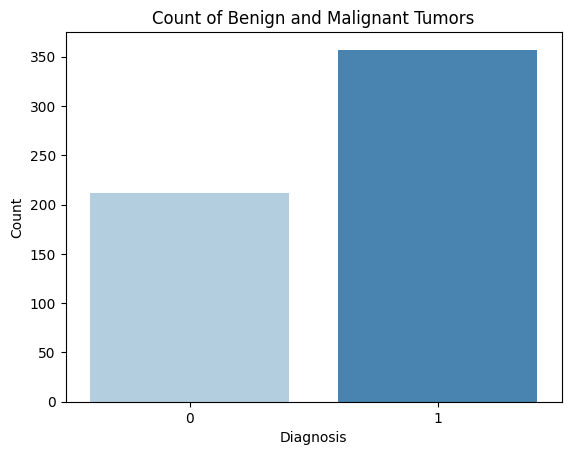

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot with 'diagnosis' on x-axis
ax = sns.countplot(x=y, label='Count', palette="Blues")

# Add labels and title
ax.set_xlabel("Diagnosis")
ax.set_ylabel("Count")
ax.set_title("Count of Benign and Malignant Tumors")

# Get the counts for benign and malignant tumors
count_values = y.value_counts()
benign_count = count_values[1]
malignant_count = count_values[0]

# Print the counts for benign and malignant tumors
print("Benign Tumors: ", benign_count)
print("Malignant Tumors: ", malignant_count)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.0% of the points cannot be plac

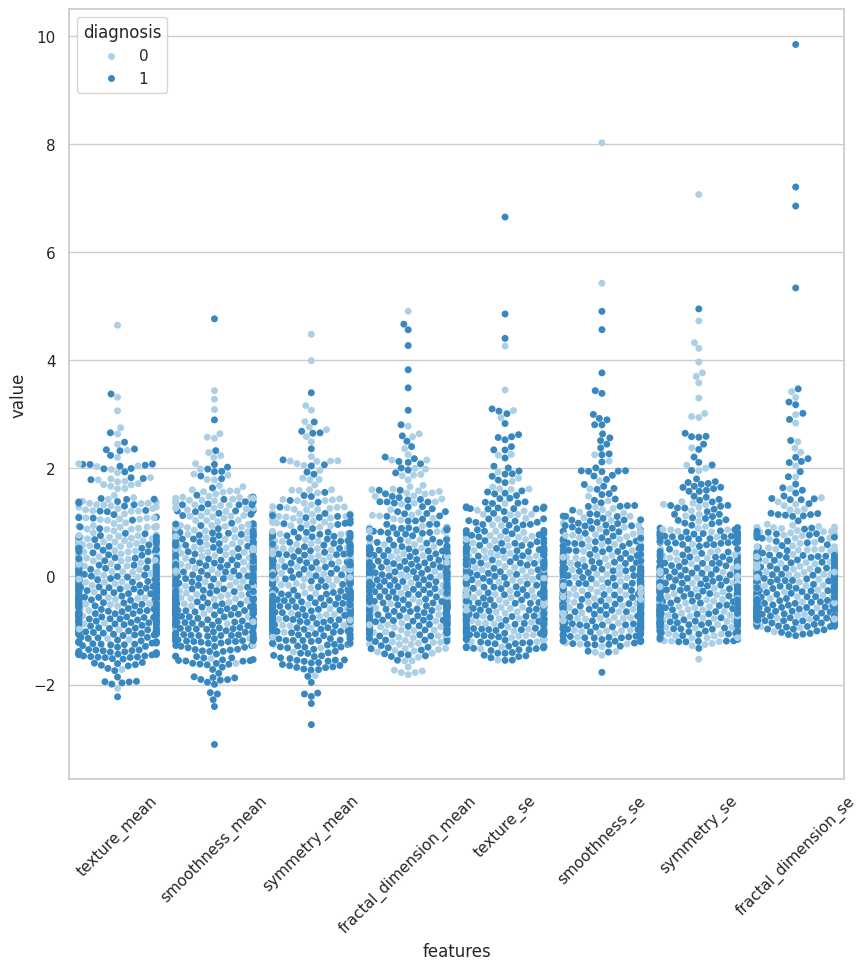

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the seaborn style
sns.set(style='whitegrid')

# Standardize the features in X
data_std = (X - X.mean()) / X.std()

# Combine the standardized data with the target 'diagnosis' column
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)

# Convert the data to a long format for swarmplot
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

# Create the swarmplot with respect to 0 (malignant) and 1 (benign)
plt.figure(figsize=(10, 10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data, palette='Blues')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


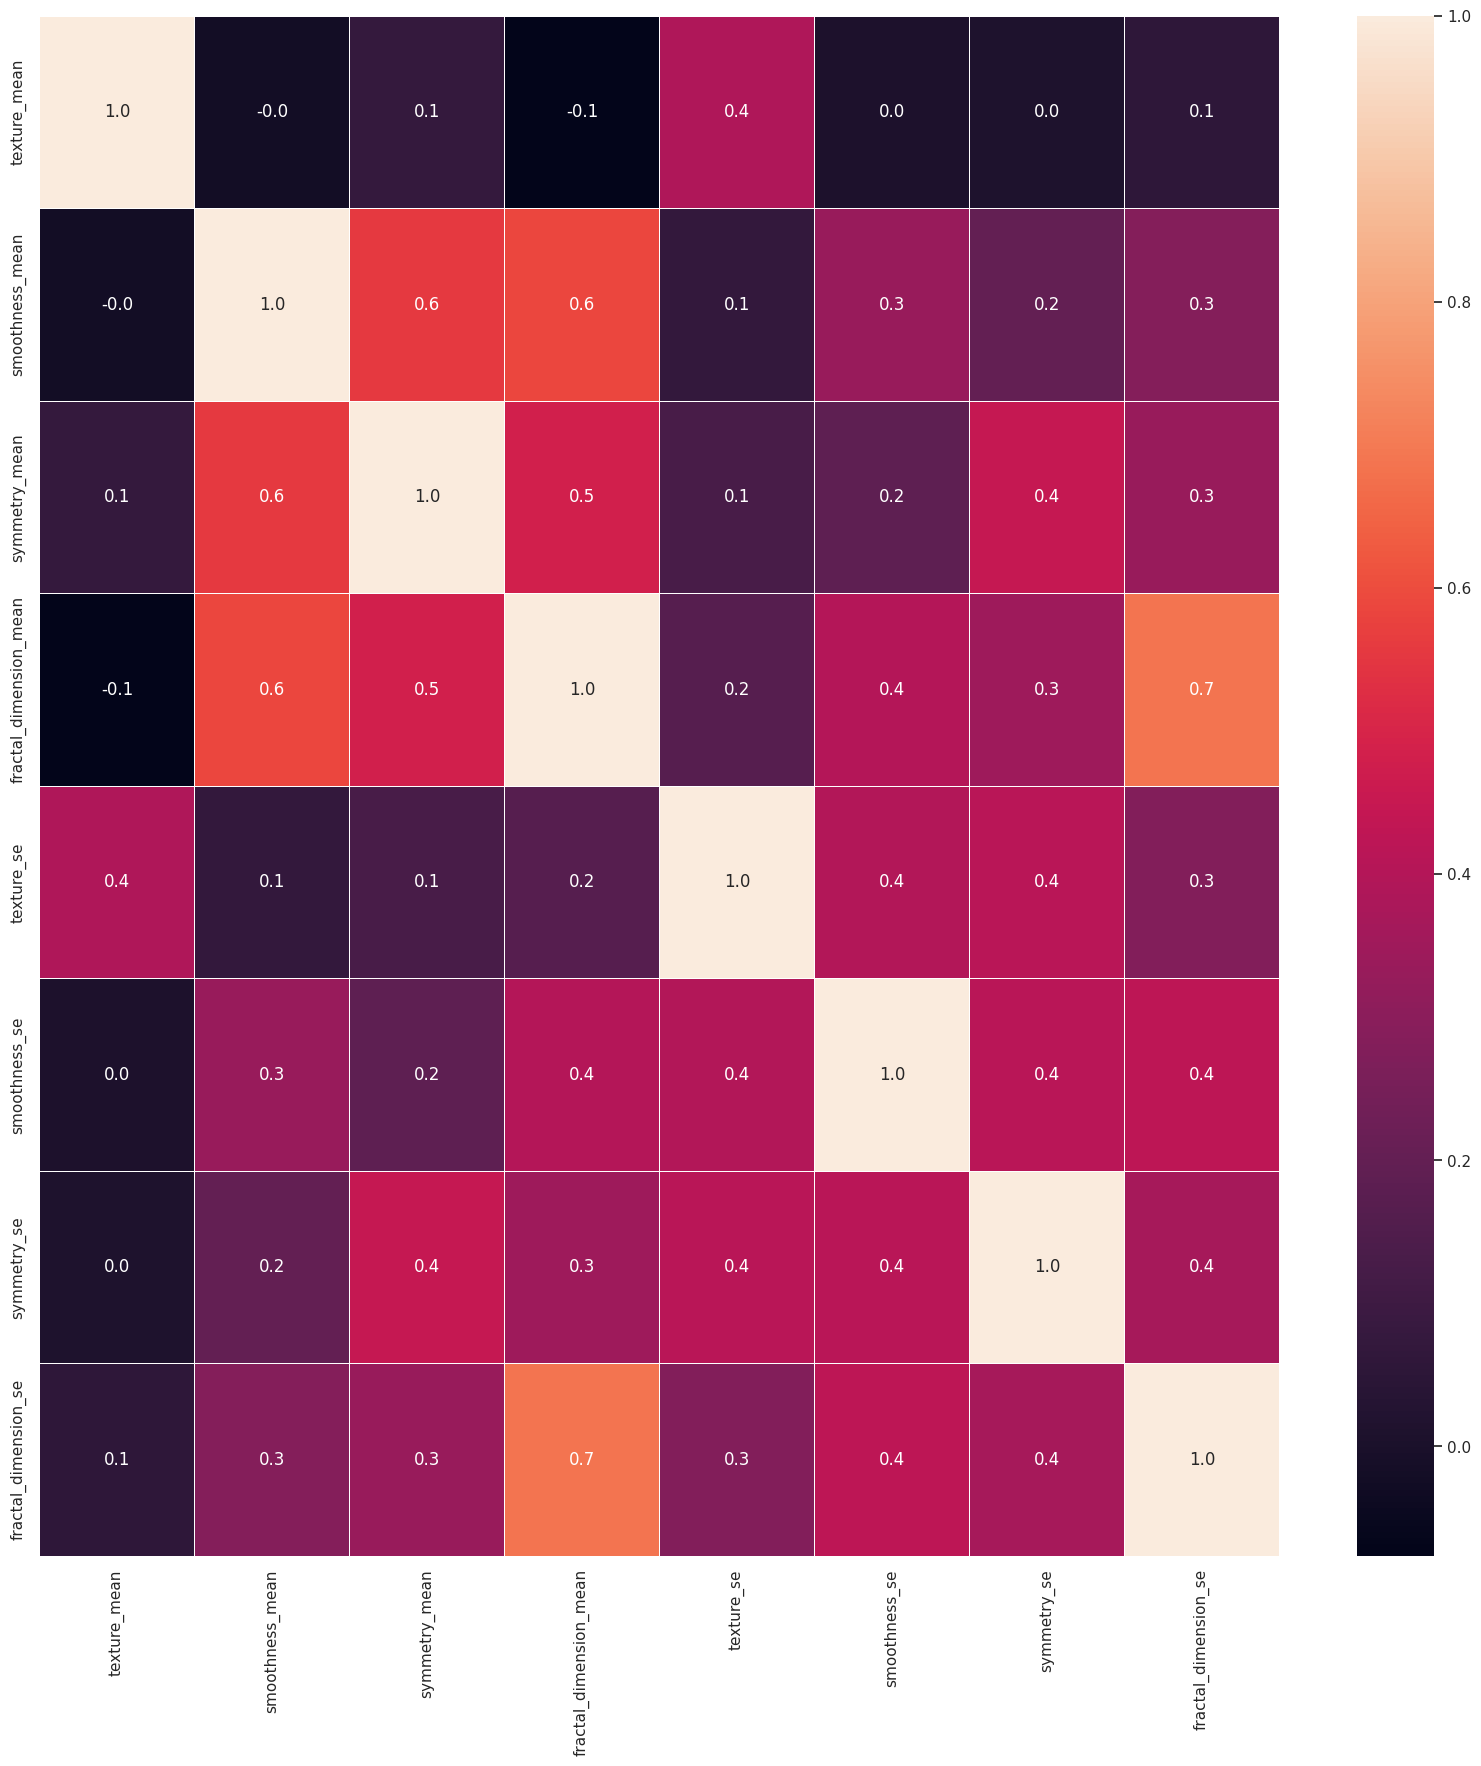

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is already defined as your feature set
f, ax = plt.subplots(figsize=(20, 20))

# Create a heatmap with proper format for annotations
sns.heatmap(X.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)

# Show the plot
plt.show()

In [54]:
# SPliting the data into training data And Testing data
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
print(X.shape,X_train.shape,X_test.shape)

(569, 8) (455, 8) (114, 8)


## Model Training - Logistic Regression

In [56]:
model=LogisticRegression()
# Training the logistic Regression model using Training data
model.fit(X_train,y_train)

LogisticRegression()

##### Model Evaluation


#### Accuracy Score

In [62]:
# accuracy score on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(y_train,X_train_prediction)

In [63]:
print('Accuracy on training data = ',training_data_accuracy)

Accuracy on training data =  0.7296703296703296


In [64]:
# accuracy score on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_prediction)

In [65]:
print('Accuracy on test data = ',test_data_accuracy)

Accuracy on test data =  0.7105263157894737


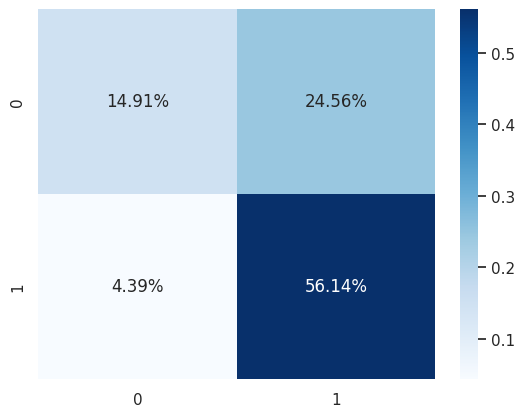

In [68]:
cm=confusion_matrix(y_test,X_test_prediction)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap="Blues")
plt.show()

In [61]:
# Building a predictive System
input_data=(21.25, 0.1096, 0.2069, 0.05999, 0.7869, 0.04006, 0.0225, 0.004571)

#change the input array to numpy array
input_data_as_numpy=np.asarray(input_data)
#reshape the numpy array as we are predicting for one data point
input_data_reshape=input_data_as_numpy.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
  print('The breast cancer is malignant')
else:
  print('The breast cancer is bemign')

[0]
The breast cancer is malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## **KNN - K Nearest Neighbour**

In [89]:
# Initialize the KNN classifier (using k=5, can be tuned)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy on training data = 0.7956043956043956
Accuracy on test data = 0.7894736842105263


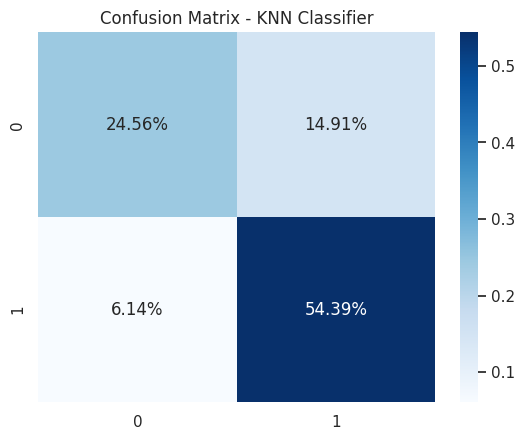

In [90]:

# Evaluate the model on the training data
X_train_prediction1 = knn_model.predict(X_train)
training_data_accuracy1 = accuracy_score(y_train, X_train_prediction1)
print('Accuracy on training data =', training_data_accuracy1)

# Evaluate the model on the testing data
X_test_prediction1 = knn_model.predict(X_test)
test_data_accuracy1 = accuracy_score(y_test, X_test_prediction1)
print('Accuracy on test data =', test_data_accuracy1)

# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, X_test_prediction1)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Blues")
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

In [91]:
# Building a predictive system with KNN
input_data = (14.36, 0.09779, 0.1885, 0.05766, 0.7886, 0.008462, 0.0198, 0.0023)

# Convert the input data to a numpy array
input_data_as_numpy = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point
input_data_reshape = input_data_as_numpy.reshape(1, -1)

# Make a prediction
prediction = knn_model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('The breast cancer is malignant')
else:
    print('The breast cancer is benign')

[1]
The breast cancer is benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


##**Random Forest Classifier**

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)

# Train the Random Forest model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [113]:
# Evaluate the model on the training data
X_train_prediction2 = rf_model.predict(X_train)
training_data_accuracy2 = accuracy_score(y_train, X_train_prediction2)
print('Accuracy on training data =', training_data_accuracy2)

# Evaluate the model on the testing data
X_test_prediction2 = rf_model.predict(X_test)
test_data_accuracy2 = accuracy_score(y_test, X_test_prediction2)
print('Accuracy on test data =', test_data_accuracy2)


Accuracy on training data = 1.0
Accuracy on test data = 0.8508771929824561


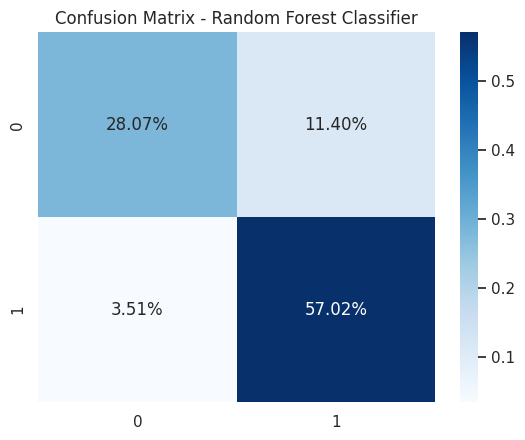

In [114]:
# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, X_test_prediction2)
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Blues")
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [115]:
# Building a predictive system with Random Forest
input_data = (14.36, 0.09779, 0.1885, 0.05766, 0.7886, 0.008462, 0.0198, 0.0023)

# Convert the input data to a numpy array
input_data_as_numpy = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point
input_data_reshape = input_data_as_numpy.reshape(1, -1)

# Make a prediction
prediction = rf_model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('The breast cancer is malignant')
else:
    print('The breast cancer is benign')

[1]
The breast cancer is benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **Decision Tree Classifier**

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=2)

# Train the Decision Tree model using the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [100]:
# Evaluate the model on the training data
X_train_prediction3 = dt_model.predict(X_train)
training_data_accuracy3 = accuracy_score(y_train, X_train_prediction3)
print('Accuracy on training data =', training_data_accuracy3)

# Evaluate the model on the testing data
X_test_prediction3 = dt_model.predict(X_test)
test_data_accuracy3 = accuracy_score(y_test, X_test_prediction3)
print('Accuracy on test data =', test_data_accuracy3)


Accuracy on training data = 1.0
Accuracy on test data = 0.7105263157894737


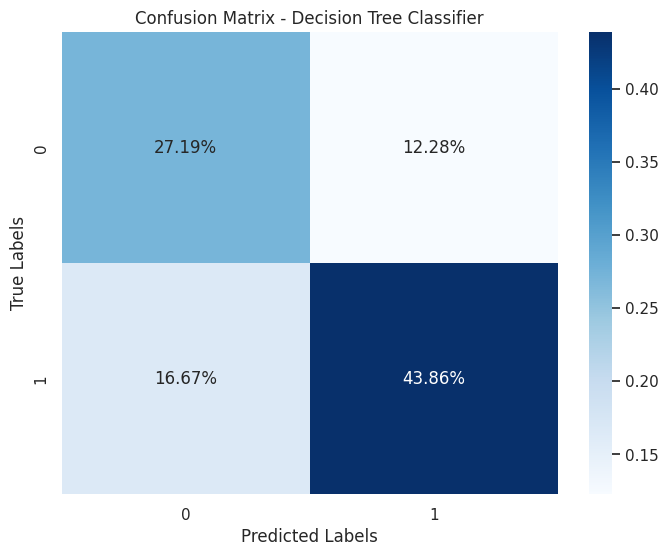

In [101]:
# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, X_test_prediction3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Blues")
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [102]:
# Building a predictive system with Random Forest
input_data = (14.36, 0.09779, 0.1885, 0.05766, 0.7886, 0.008462, 0.0198, 0.0023)

# Convert the input data to a numpy array
input_data_as_numpy = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point
input_data_reshape = input_data_as_numpy.reshape(1, -1)

# Make a prediction
prediction = rf_model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('The breast cancer is malignant')
else:
    print('The breast cancer is benign')

[1]
The breast cancer is benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **Naive-Bayes**

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
# Initialize the Naive Bayes Classifier
nb_model = GaussianNB()

# Train the Naive Bayes model using the training data
nb_model.fit(X_train, y_train)

GaussianNB()

In [105]:
# Evaluate the model on the training data
X_train_prediction4 = nb_model.predict(X_train)
training_data_accuracy4 = accuracy_score(y_train, X_train_prediction4)
print('Accuracy on training data =', training_data_accuracy4)

# Evaluate the model on the testing data
X_test_prediction4 = nb_model.predict(X_test)
test_data_accuracy4 = accuracy_score(y_test, X_test_prediction4)
print('Accuracy on test data =', test_data_accuracy4)


Accuracy on training data = 0.7736263736263737
Accuracy on test data = 0.7631578947368421


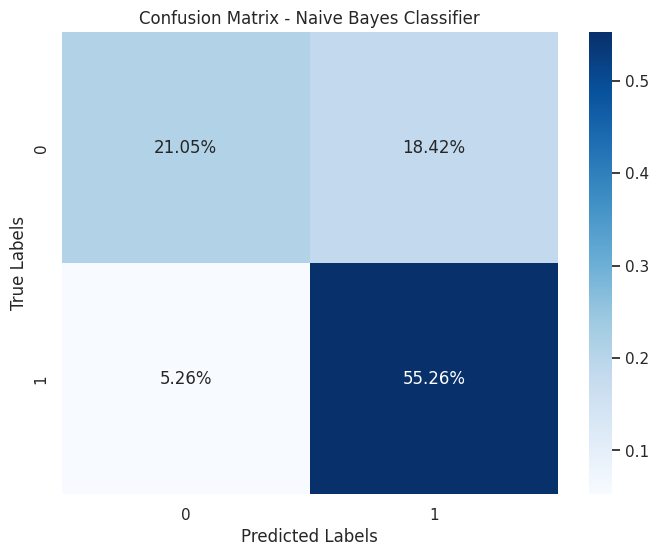

In [106]:
# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, X_test_prediction4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap="Blues")
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()